In [29]:
%pip install colabcode


Note: you may need to restart the kernel to use updated packages.


In [30]:
from colabcode import ColabCode


In [31]:
%pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [32]:
# Step 1: Load Dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine into single DataFrame for convenience
df = pd.concat([X, y], axis=1)

print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())


Shape of dataset: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-nul

In [33]:
# Save the dataset as a CSV file
df.to_csv("heart_disease_uci.csv", index=False)

print("Dataset saved as heart_disease_uci.csv")


Dataset saved as heart_disease_uci.csv


In [34]:
df = pd.read_csv("heart_disease_uci.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [35]:
# Check missing values
print("\nMissing values before handling:\n", df.isnull().sum())

# Numeric columns: impute with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns: impute with mode
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())



Missing values before handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing values after handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


C:\Users\Marim\AppData\Local\Temp\ipykernel_8800\2325129661.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Marim\AppData\Local\Temp\ipykernel_8800\2325129661.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [36]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)
print("Shape after encoding:", df.shape)


Shape after encoding: (303, 14)


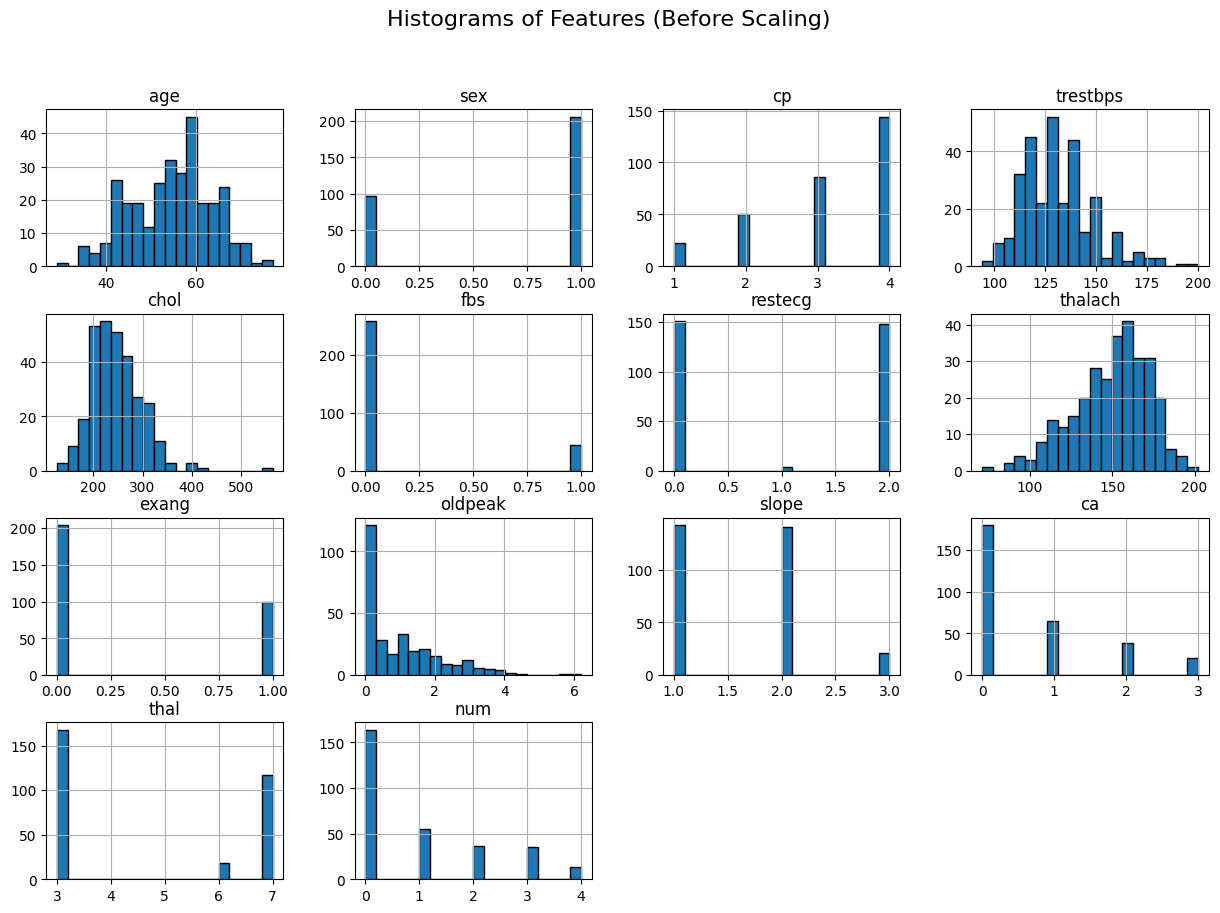

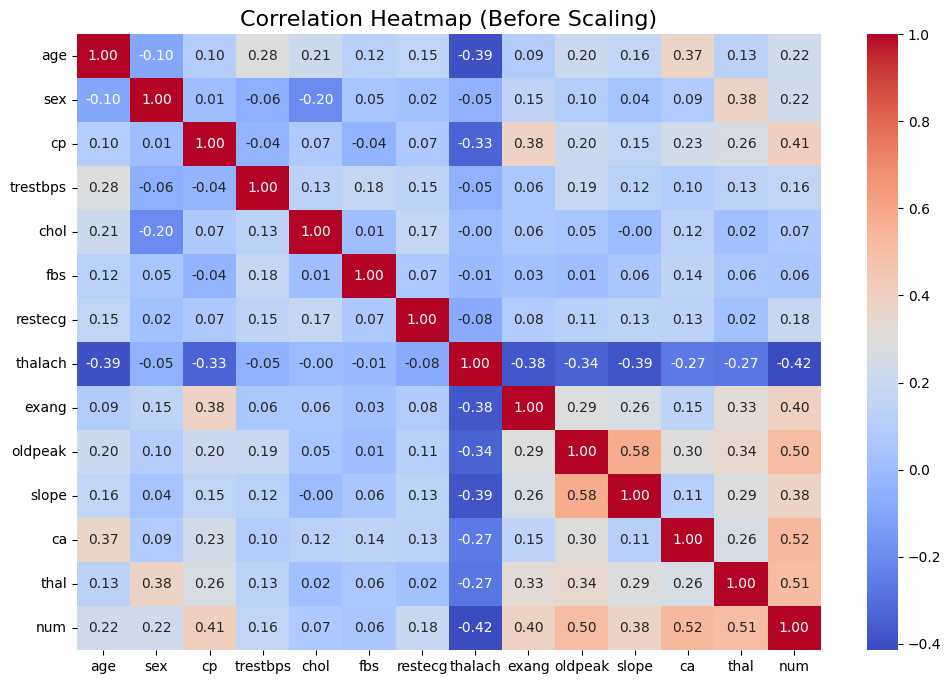

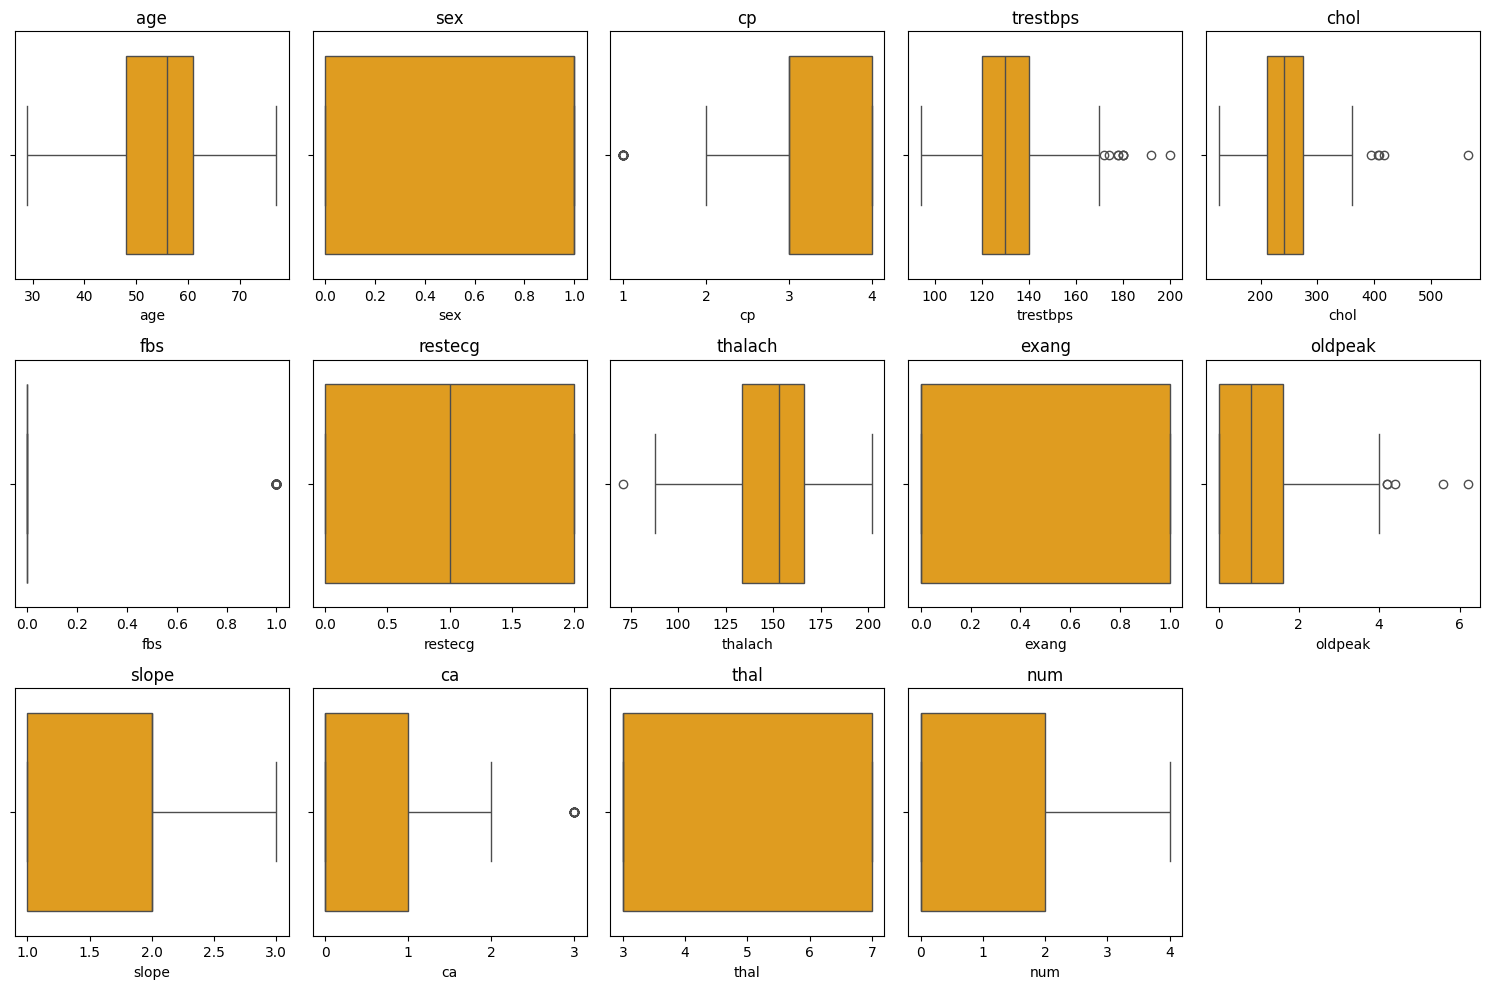

In [37]:
# 1. Histograms
# -------------------
df.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Features (Before Scaling)", fontsize=16)
plt.show()

# -------------------
# 2. Correlation Heatmap
# -------------------
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Before Scaling)", fontsize=16)
plt.show()

# -------------------
# 3. Boxplots
# -------------------
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[col], color="orange")
    plt.title(col)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

# Define continuous numerical features (to be scaled)
continuous_cols = [ 'age','trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Scale only continuous features
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Final dataset shape:", df_encoded.shape)
print(df_encoded.head())


Final dataset shape: (303, 21)
        age  trestbps      chol   thalach   oldpeak  num  sex_1   cp_2   cp_3  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338    0   True  False  False   
1  1.392002  1.611220  0.760415 -1.821905  0.397182    2   True  False  False   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147    1   True  False  False   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573    0   True  False   True   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912    0  False   True  False   

    cp_4  ...  restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1.0  \
0  False  ...      False       True    False    False     True   False   
1   True  ...      False       True     True     True    False   False   
2   True  ...      False       True     True     True    False   False   
3  False  ...      False      False    False    False     True   False   
4  False  ...      False       True    False    False    False   False   

   ca_2.0  ca_3.0  thal_6.0  thal_7.0

In [43]:
# Save the preprocessed dataset to CSV
df_encoded= df_encoded.replace({True: 1, False: 0})

df_encoded.to_csv("heart_disease_processed.csv", index=False)

print("✅ Processed dataset saved as 'heart_disease_processed.csv'")



✅ Processed dataset saved as 'heart_disease_processed.csv'


C:\Users\Marim\AppData\Local\Temp\ipykernel_8800\3408219363.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded= df_encoded.replace({True: 1, False: 0})


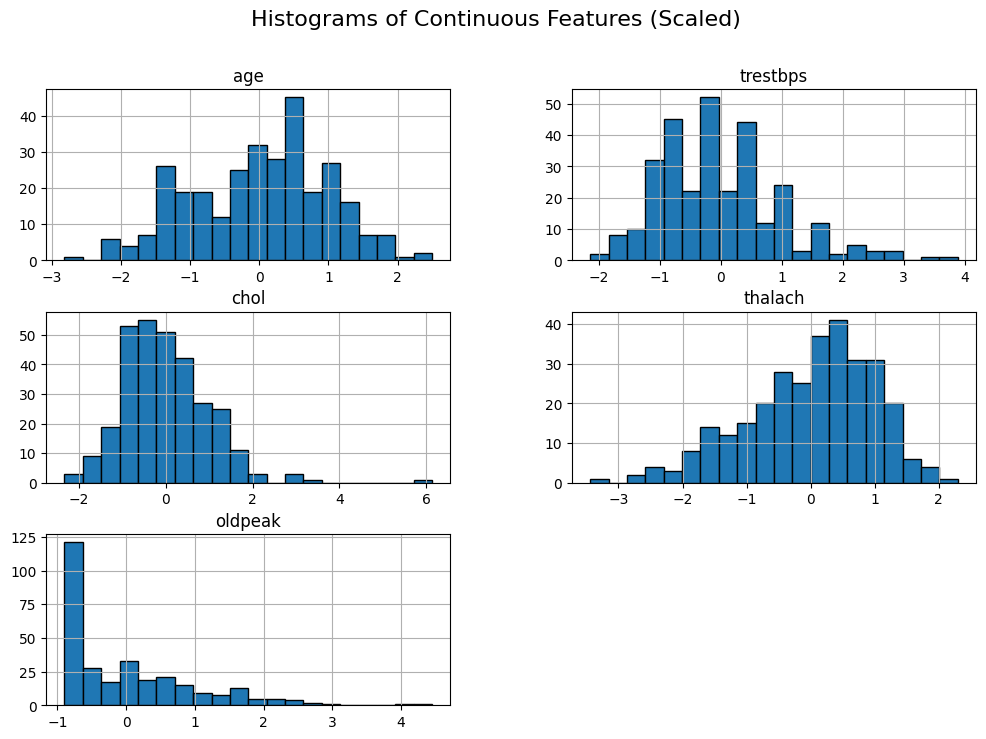

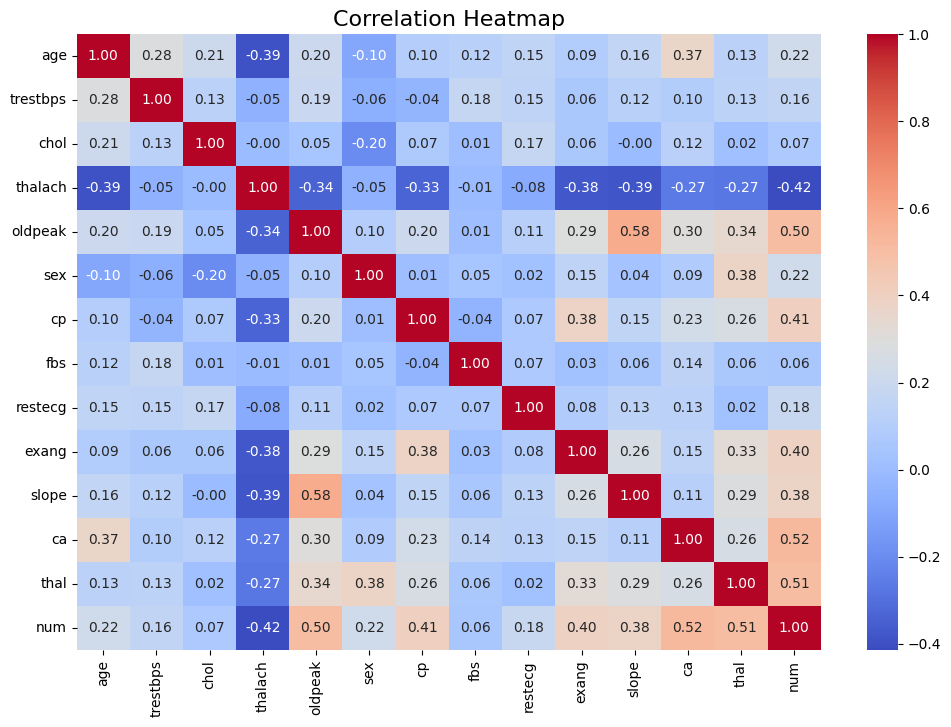

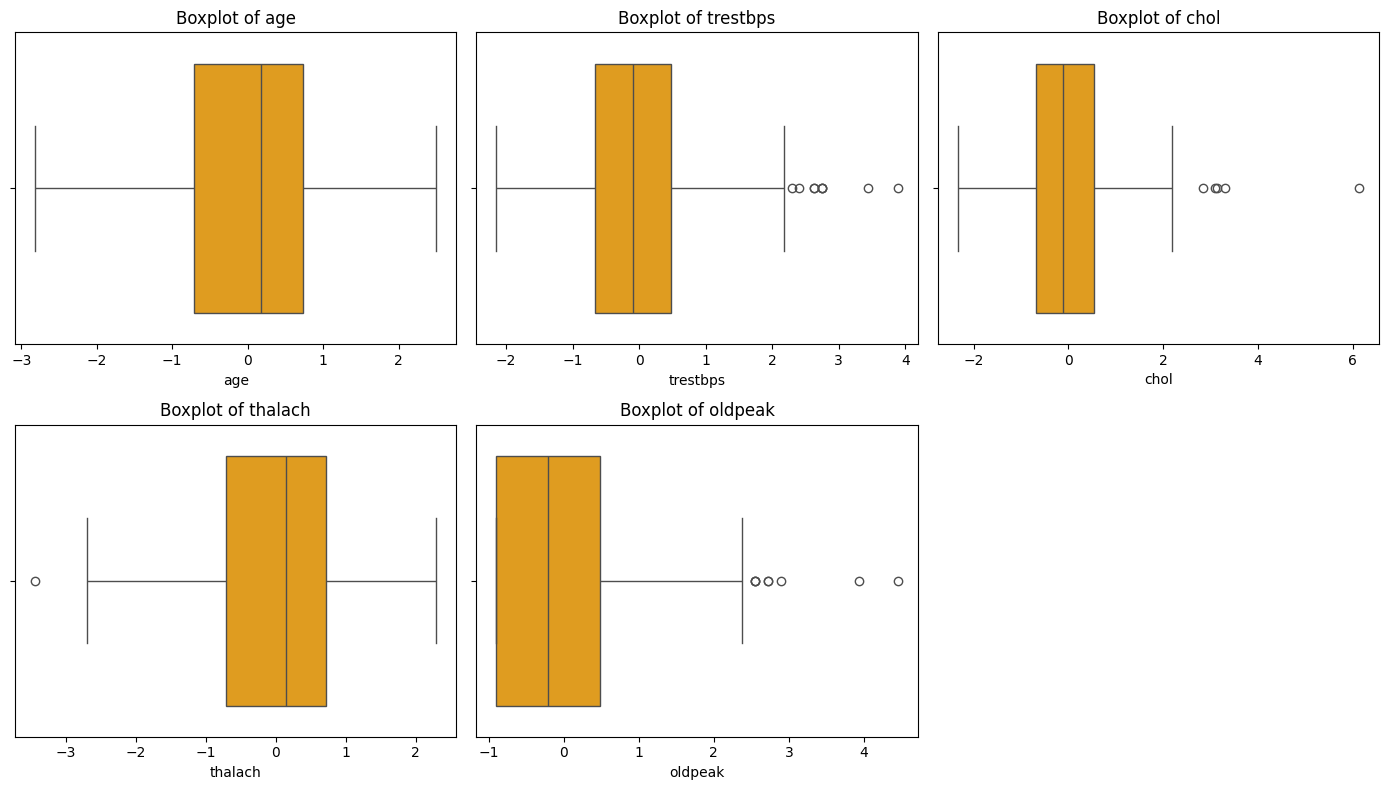

In [40]:
# Histograms of continuous features
df[continuous_cols].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Continuous Features (Scaled)", fontsize=16)
plt.show()

# Correlation Heatmap (before encoding, easier to interpret)
plt.figure(figsize=(12,8))
sns.heatmap(df[continuous_cols + categorical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Boxplots of continuous features
plt.figure(figsize=(14,8))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
